### Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:

- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

In [1]:
# importing packages
%matplotlib inline
import matplotlib.pyplot as plt 

import pandas as pd
import numpy as np

In [2]:
import keras

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


Using TensorFlow backend.


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# reading csv file
data = pd.read_csv('student_data.csv')
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [5]:
# plot function
def plot_points(data):
    X = np.array(data[["gre", "gpa"]])
    y = np.array(data[["admit"]])
    admitted = X[np.argwhere(y == 1)]
    rejected = X[np.argwhere(y == 0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')    

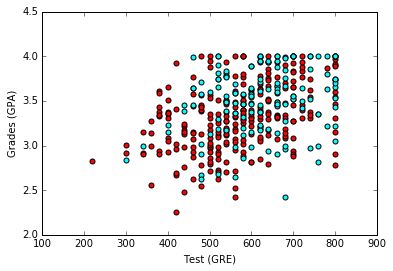

In [6]:
# plotting the points
plot_points(data)
plt.show()

In [7]:
# separating the ranks
data_rank1 = data[data["rank"] == 1]
data_rank2 = data[data["rank"] == 2]
data_rank3 = data[data["rank"] == 3]
data_rank4 = data[data["rank"] == 4]

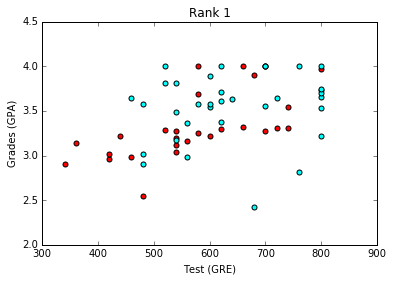

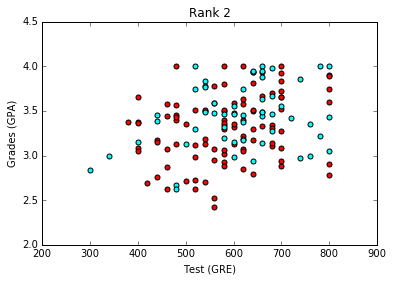

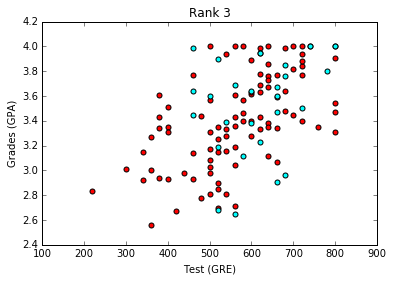

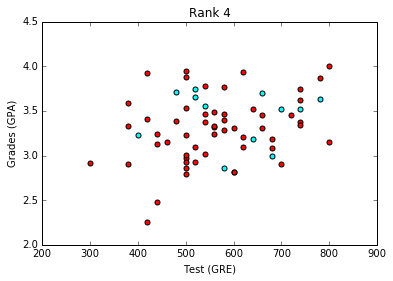

In [8]:
# plotting
plot_points(data_rank1)
plt.title('Rank 1')
plt.show()

plot_points(data_rank2)
plt.title('Rank 2')
plt.show()

plot_points(data_rank3)
plt.title('Rank 3')
plt.show()

plot_points(data_rank4)
plt.title('Rank 4')
plt.show()

### One-hot Encoding

In [9]:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix = 'rank')], axis = 1)
one_hot_data = one_hot_data.drop('rank', axis = 1)
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


### Scaling the data

In [10]:
processed_data = one_hot_data[:]
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


### Splitting the data into training and testing

In [11]:
sample = np.random.choice(processed_data.index, size = int(len(processed_data) * 0.9), replace = False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)
print('Number of training sample is', len(train_data))
print('Number of testing sample is', len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training sample is 360
Number of testing sample is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
359      0  0.900  0.9850       0       0       1       0
97       0  0.600  0.8925       0       1       0       0
70       0  0.800  1.0000       0       0       1       0
204      1  0.750  0.9725       1       0       0       0
225      1  0.900  0.8750       0       0       1       0
7        0  0.500  0.7700       0       1       0       0
6        1  0.700  0.7450       1       0       0       0
195      0  0.700  0.8975       0       1       0       0
232      0  0.475  0.8450       0       1       0       0
242      1  0.850  0.7400       0       0       1       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
2       1  1.000  1.0000       1       0       0       0
29      0  0.650  0.8225       1       0       0       0
32      0  0.750  0.8500       0       0       1       0
35      0  0.500  0.7625       0       1       0       0
49      0  0.

### Splitting the data into features and targets

In [12]:
features = np.array(train_data.drop('admit', axis = 1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], 2))
features_test = np.array(test_data.drop('admit', axis = 1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

print(features[:10])
print(targets[:10])

[[ 0.9     0.985   0.      0.      1.      0.    ]
 [ 0.6     0.8925  0.      1.      0.      0.    ]
 [ 0.8     1.      0.      0.      1.      0.    ]
 [ 0.75    0.9725  1.      0.      0.      0.    ]
 [ 0.9     0.875   0.      0.      1.      0.    ]
 [ 0.5     0.77    0.      1.      0.      0.    ]
 [ 0.7     0.745   1.      0.      0.      0.    ]
 [ 0.7     0.8975  0.      1.      0.      0.    ]
 [ 0.475   0.845   0.      1.      0.      0.    ]
 [ 0.85    0.74    0.      0.      1.      0.    ]]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]


### Model arquitecture

In [13]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [14]:
model.fit(features, targets, epochs = 200, batch_size = 100, verbose = 0)

### Scoring the model

In [15]:
score = model.evaluate(features, targets)
print('\n Training Accuracy:', score[1])
score = model.evaluate(features_test, targets_test)
print('\n Testing Accuracy:', score[1])

360/360 [==============================] - 0s 894us/step

 Training Accuracy: 0.7
40/40 [==============================] - 0s 250us/step

 Testing Accuracy: 0.8


## Challenge: Play with the parameters!
You can see that we made several decisions in our training. For instance, the number of layers, the sizes of the layers, the number of epochs, etc.
It's your turn to play with parameters! Can you improve the accuracy? The following are other suggestions for these parameters. We'll learn the definitions later in the class:
- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada